# Introduction to word embeddings

## 1. Classifying bank complaints using an RNN and word embedding

### 1.1 The data

In [93]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential 
from keras.layers import Flatten, Dense
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding
from keras import preprocessing

df = pd.read_csv('Bank_complaints.csv')
df.head()

,Product,Consumer complaint narrative
0,Student loan,In XX/XX/XXXX I filled out the Fedlaon applica...
1,Student loan,I am being contacted by a debt collector for p...
2,Student loan,I cosigned XXXX student loans at SallieMae for...
3,Student loan,Navient has sytematically and illegally failed...
4,Student loan,My wife became eligible for XXXX Loan Forgiven...


In [94]:
import random
random.seed(123)
df = df.sample(10000)

In [95]:
df.index = range(10000)

In [96]:
product = df["Product"]

There are 7 types of complaints

In [97]:
product.value_counts()

Student loan                   1890
Credit card                    1626
Consumer Loan                  1573
Mortgage                       1407
Bank account or service        1351
Credit reporting               1138
Checking or savings account    1015
Name: Product, dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Product                         10000 non-null object
Consumer complaint narrative    10000 non-null object
dtypes: object(2)
memory usage: 156.3+ KB


In [65]:
complaints = df["Consumer complaint narrative"]

### Embedding layer

We're going to create our own embedding. Let's start with importing an embedding layer. The embedding layer has two mandatory arguments: The possible number of tokens, and the number of embeddings (200 in this case)

In [66]:
embedding_layer = Embedding(1000, 200)

Only keep 2,000 most common words and use one-hot encoding

In [67]:
tokenizer = Tokenizer(num_words=2000)

In [68]:
tokenizer.fit_on_texts(complaints)

In [69]:
sequences = tokenizer.texts_to_sequences(complaints)

In [70]:
sequences= np.asarray(sequences)

In [71]:
sequences

array([list([73, 45, 389, 323, 189, 13, 6, 23, 60, 389, 612, 544, 17, 2, 238, 10, 315, 458, 9, 5, 2, 716, 78, 107, 457, 75, 124, 6, 23, 2, 238, 10, 1417, 394, 4, 256, 13, 2, 1796, 1034, 1, 34, 1, 1, 77, 1146, 4, 326, 17, 8, 128, 45, 16, 185, 5, 8, 3, 468, 15, 20, 36, 183, 46, 3, 314, 8, 19, 16, 2, 238, 77, 819, 5, 41, 17, 3, 10, 1684, 3, 115, 14, 206, 1627, 9, 343, 26, 2, 554, 8, 77, 302, 299, 136, 436, 5, 1, 175, 8, 77, 44, 16, 178, 4, 783, 62, 77, 44, 16, 269, 77, 82, 8, 62, 131, 308, 27, 252, 190, 20, 36, 3, 468, 15, 538, 54, 19, 16, 2, 238, 46, 3, 593, 4, 92, 77, 10, 544, 17, 5, 115, 136, 4, 359, 62, 3, 10, 486, 56, 77, 405, 4, 74, 5, 1078, 80, 13, 17, 7, 355, 106, 204, 3, 59, 7, 108, 26, 127, 240, 8, 216, 159, 11, 2, 185, 238, 27, 35, 166, 11, 2, 554, 1934, 187, 1, 865, 4, 541, 17, 4, 710, 20, 149, 196, 83, 2, 238, 42, 783, 2, 189, 28, 12, 45, 382, 4, 48, 56]),
       list([1573, 1110, 3, 464, 6, 20, 127, 5, 27, 6, 1548, 213, 22, 4, 6, 490, 30, 23, 20, 127, 6, 1548, 103, 37, 577, 

In [72]:
# this will turn the sequence array into an array with
# the 30 most common words per sequence.
max_complaint= 30
seq_padded = preprocessing.sequence.pad_sequences(sequences, 
                                               maxlen=max_complaint)

In [73]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(product)
list(le.classes_)
product_cat = le.transform(product) 
product_onehot = to_categorical(product_cat)

In [75]:
np.shape(product_onehot)

(10000, 7)

In [76]:
np.shape(seq_padded)

(10000, 30)

In [90]:
x_train, x_test, y_train, y_test = train_test_split(seq_padded,  
            product_onehot, test_size=0.10, random_state=123)

In [98]:
model = Sequential()
model.add(Embedding(2000, 10, input_length = max_complaint))
model.add(Flatten())
model.add(Dense(7, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(x_train, y_train, epochs=30,
batch_size=32, validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 30, 10)            20000     
_________________________________________________________________
flatten_8 (Flatten)          (None, 300)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 2107      
Total params: 22,107
Trainable params: 22,107
Non-trainable params: 0
_________________________________________________________________
Train on 7200 samples, validate on 1800 samples
Epoch 1/30
7200/7200 [==============================] - 1s 118us/step - loss: 1.9319 - acc: 0.1758 - val_loss: 1.9131 - val_acc: 0.2056
Epoch 2/30
7200/7200 [==============================] - 1s 74us/step - loss: 1.8497 - acc: 0.2528 - val_loss: 1.8230 - val_acc: 0.2661
Epoch 3/30
7200/7200 [==============================] - 1s 80us/step - loss: 1.7030

### 1.1.3 convert the products to numerical categories

In [57]:
np.shape(product_onehot)

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

### 1.1.4 Train - test split

In [25]:
import random
random.seed(123)
test_index = random.sample(range(1,10000), 1500)

Create a test and a training set

In [26]:
test = one_hot_results[test_index]
train = np.delete(one_hot_results, test_index, 0)

In [27]:
label_test = product_onehot[test_index]
label_train = np.delete(product_onehot, test_index, 0)

In [28]:
print(np.shape(label_test))
print(np.shape(label_train))
print(np.shape(test))
print(np.shape(train))

(1500, 7)
(8500, 7)
(1500, 2000)
(8500, 2000)


# 1.2 Building the network

Let's build a fully connected (Dense) layer network with relu activations in Keras. You can do this using: `Dense(16, activation='relu')`.

In this examples, use 2 hidden with 50 units in the first layer and 25 in the second, both with a `relu` activation function. Because we are dealing with a multiclass problem (classifying the complaints into 7 ), we use a use a softmax classifyer in order to output 7 class probabilities per case.

In [29]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(50, activation='relu', input_shape=(2000,))) #2 hidden layers
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

### 1.3 Compiling the model and look at the results

In [30]:
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In the compiler, you'll be passing the optimizer (SGD = stochastic gradient descent), loss function, and metrics. Train the model for 120 epochs in mini-batches of 256 samples.

In [31]:
history = model.fit(train,
                    label_train,
                    epochs=120,
                    batch_size=256)

Epoch 1/120
8500/8500 [==============================] - 1s 73us/step - loss: 1.9436 - acc: 0.1508
Epoch 2/120
8500/8500 [==============================] - 0s 44us/step - loss: 1.9248 - acc: 0.1656
Epoch 3/120
8500/8500 [==============================] - 0s 41us/step - loss: 1.9070 - acc: 0.1867
Epoch 4/120
8500/8500 [==============================] - 0s 42us/step - loss: 1.8885 - acc: 0.2155
Epoch 5/120
8500/8500 [==============================] - 0s 43us/step - loss: 1.8673 - acc: 0.2448
Epoch 6/120
8500/8500 [==============================] - 0s 43us/step - loss: 1.8428 - acc: 0.2746
Epoch 7/120
8500/8500 [==============================] - 0s 41us/step - loss: 1.8141 - acc: 0.3031
Epoch 8/120
8500/8500 [==============================] - 0s 45us/step - loss: 1.7809 - acc: 0.3322
Epoch 9/120
8500/8500 [==============================] - 0s 43us/step - loss: 1.7423 - acc: 0.3611
Epoch 10/120
8500/8500 [==============================] - 0s 45us/step - loss: 1.6976 - acc: 0.3942
Epoch 11/

8500/8500 [==============================] - 0s 44us/step - loss: 0.4305 - acc: 0.8555
Epoch 84/120
8500/8500 [==============================] - 0s 48us/step - loss: 0.4269 - acc: 0.8565
Epoch 85/120
8500/8500 [==============================] - 0s 49us/step - loss: 0.4238 - acc: 0.8588
Epoch 86/120
8500/8500 [==============================] - 0s 41us/step - loss: 0.4208 - acc: 0.8581
Epoch 87/120
8500/8500 [==============================] - 0s 44us/step - loss: 0.4173 - acc: 0.8599
Epoch 88/120
8500/8500 [==============================] - 0s 45us/step - loss: 0.4145 - acc: 0.8629
Epoch 89/120
8500/8500 [==============================] - 0s 47us/step - loss: 0.4106 - acc: 0.8626
Epoch 90/120
8500/8500 [==============================] - 0s 52us/step - loss: 0.4079 - acc: 0.8633
Epoch 91/120
8500/8500 [==============================] - 0s 42us/step - loss: 0.4044 - acc: 0.8649
Epoch 92/120
8500/8500 [==============================] - 0s 52us/step - loss: 0.4018 - acc: 0.8676
Epoch 93/120


The dictionary `history` two four entries:the loss and the accuracy achieved using the training set.

In [40]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc'])

### 1.5 Plot the results

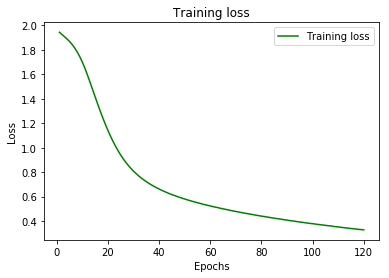

In [33]:
plt.clf()

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'g', label='Training loss')

plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

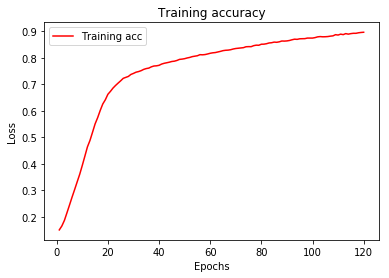

In [34]:
plt.clf()

acc_values = history_dict['acc'] 

plt.plot(epochs, acc_values, 'r', label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

It seems like we could just keep on going and accuracy would go up!

### 1.6 Make predictions

In [35]:
model.predict(test)

array([[1.06151097e-01, 8.72494001e-03, 9.37283877e-03, ...,
        2.33645295e-03, 8.40648636e-03, 4.21141041e-03],
       [2.41936068e-04, 1.69532810e-04, 2.00180747e-02, ...,
        7.21346005e-04, 9.78354275e-01, 4.66292171e-04],
       [9.07349866e-03, 3.46302823e-03, 6.77565277e-01, ...,
        3.38084972e-03, 5.10880537e-02, 2.39690319e-01],
       ...,
       [1.32557216e-06, 5.79976387e-08, 5.86538634e-04, ...,
        6.85194391e-05, 5.04806849e-05, 9.99173701e-01],
       [4.87261534e-01, 4.84817386e-01, 1.04790460e-02, ...,
        1.14200826e-04, 2.48147408e-03, 2.99849897e-04],
       [1.54565871e-01, 5.48717007e-02, 6.23438284e-02, ...,
        6.70262501e-02, 3.82260531e-02, 6.01423625e-03]], dtype=float32)

In [36]:
results_train = model.evaluate(train, label_train)

8500/8500 [==============================] - 1s 59us/step


In [37]:
results_test = model.evaluate(test, label_test)

1500/1500 [==============================] - 0s 61us/step


In [38]:
results_train

[0.32630365138895373, 0.8941176470307742]

In [39]:
results_test

[0.6355742130279541, 0.7619999996821085]

We can see that the training set results are really good (a 89.4% classification accuracy!), but the test set results lag behind. In the next lab. We'll talk a little more about this in the next lecture, and will discuss how we can get better test set results as well!

# SOURCES

https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Consumer_complaints.ipynb

https://catalog.data.gov/dataset/consumer-complaint-database